<a href="https://colab.research.google.com/github/gnbhub/gnb_2022_1_Ai_team3/blob/master/Week3/parkwonae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
housing=datasets.load_boston()

housing.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])

print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


주택은 총 506개

In [ ]:
df=pd.concat([data, target], axis=1) 
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
#Quiz 결측값 확인 - 0: 결측값 없음
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

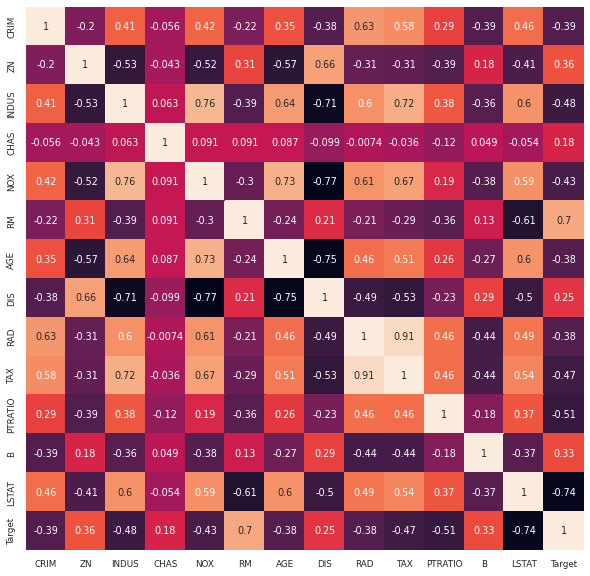

In [ ]:
df_corr = df.corr()

plt.figure(figsize=(10,10)) #이미지 크기 지정
sns.set(font_scale=0.8) #폰트 크기 지정
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

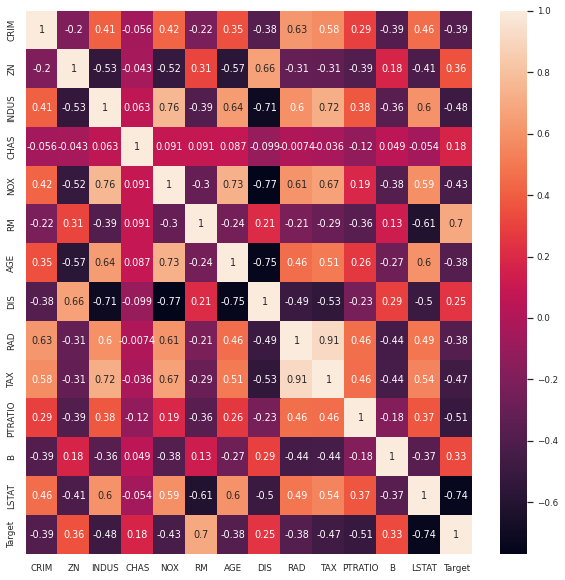

In [ ]:
df_corr = df.corr()

plt.figure(figsize=(10,10)) #이미지 크기 지정
sns.set(font_scale=0.8) #폰트 크기 지정
sns.heatmap(df_corr, annot=True, cbar=True)
plt.show()

In [ ]:
corr_order = df_corr.loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False) #Target 열과 상관계수가 높은 순서대로, abs: 상관계수를 모두 양수로(절댓값) #sort_values(ascending=False):상관계수 값을 기준으로 내림차순 정렬
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [ ]:
plot_cols=['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df=df.loc[:, plot_cols] #[전체 행, 열 이름]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


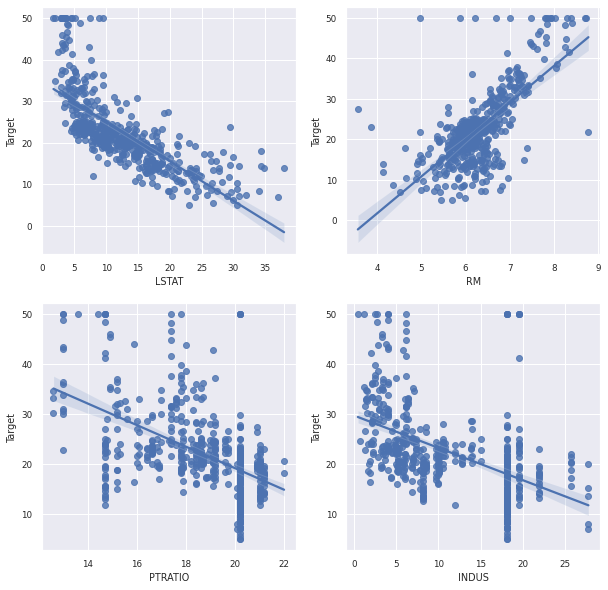

In [ ]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]): #https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=magnking&logNo=221276612647
    ax1=plt.subplot(2, 2, idx+1) #한 번에 여러개의 그래프를 그리려면 plt.subplots(행, 열, IDX) 를 이용, idx는 0부터, IDX는 1부터
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1) 
plt.show()

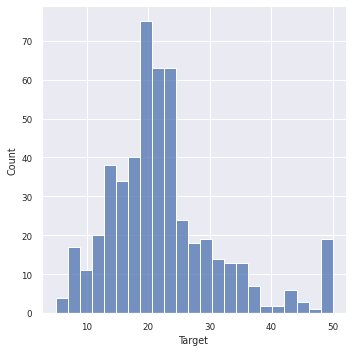

In [ ]:
sns.displot(x='Target', kind='hist', data=df)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler #MinMaxScaler: 데이터를 0-1사이의 값으로 변환
scaler=MinMaxScaler()

df_scaled=df.iloc[:, :-1] #iloc 인덱서는 범위의 끝을 포함하지 않음. 즉, 마지막열(-1)은 제외
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

df.iloc[:, :-1] = df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


Scaler의 fit()과 transform()

fit() : 데이터 변환을 학습, 학습용 데이터에만 적용

transform() : 실제 데이터의 스케일을 조정, 학습용 데이터와 테스트 데이터에 적용

출처: https://ebbnflow.tistory.com/137 

In [ ]:
#학습-테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_data=df.loc[:, ['LSTAT', 'RM']] #학습데이터
y_data=df.loc[:, 'Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12) #506개의 주택 샘플 중 20%를 모델 평가에 사용

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

print("회귀계수(기울기): ", np.round(lr.coef_, 1)) #np.round(수, 자리 수): 반올림, lr.coef_: 기울기
print("상수항(절편):", np.round(lr.intercept_, 1))


회귀계수(기울기):  [-23.2  25.4]
상수항(절편): 16.3


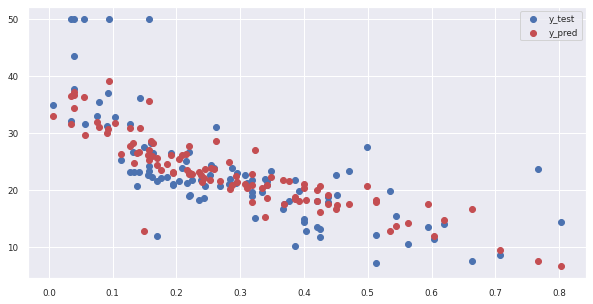

In [ ]:
y_test_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test') #X축, Y축 값을 순서대로 입력, 범례에 표시할 값을 label 옵션에 지정
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best') #범례를 표시하는 명형, loc 옵션으로 범례가 표시되는 위치를 지정
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse=mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" %train_mse)

test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" %test_mse)

Train MSE: 30.8042
Test MSE: 29.5065


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
X_train_poly=pf.fit_transform(X_train)
print("원본 학습 데이터셋: ", X_train.shape)
print("2차 다항식 변환 데이터셋: ", X_train_poly.shape)

원본 학습 데이터셋:  (404, 2)
2차 다항식 변환 데이터셋:  (404, 6)


In [ ]:
lr=LinearRegression()
lr.fit(X_train_poly, y_train)

y_train_pred=lr.predict(X_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" %train_mse)

X_test_poly=pf.fit_transform(X_test)
y_test_pred=lr.predict(X_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" %test_mse)

Train MSE: 21.5463
Test MSE: 16.7954


In [ ]:
pf=PolynomialFeatures(degree=15)
X_train_poly=pf.fit_transform(X_train)

lr=LinearRegression()
lr.fit(X_train_poly, y_train)

y_train_pred=lr.predict(X_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" %train_mse)

X_test_poly=pf.fit_transform(X_test)
y_test_pred=lr.predict(X_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" %test_mse)

Train MSE: 11.1589
Test MSE: 108504063264728.0625


train MSE는 감소, test MSE는 급격하게 상승(과대적합상태)

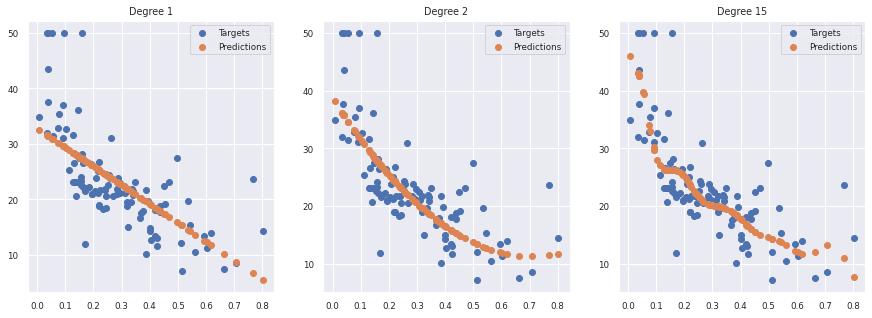

In [ ]:
plt.figure(figsize=(15,5))
for n, deg in enumerate([1,2,15]):
    ax1=plt.subplot(1,3,n+1)
    
    pf=PolynomialFeatures(degree=deg)
    X_train_poly=pf.fit_transform(X_train.loc[:, ['LSTAT']])
    X_test_poly=pf.fit_transform(X_test.loc[:, ['LSTAT']])
    lr=LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_test_pred=lr.predict(X_test_poly)

    plt.scatter(X_test.loc[:, ["LSTAT"]], y_test, label="Targets") #실제값 분포
    plt.scatter(X_test.loc[:, ["LSTAT"]], y_test_pred, label='Predictions') #예측값 분포
    plt.title("Degree %d" %deg) #제목 표시
    plt.legend() #범례 표시
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
rdg=Ridge(alpha=2.5) #alpha 값으로 규제 강도를 조정
rdg.fit(X_train_poly, y_train)

y_train_pred=rdg.predict(X_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" %train_mse)

y_test_pred=rdg.predict(X_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" %test_mse)

Train MSE: 35.9484
Test MSE: 42.0011


In [ ]:
from sklearn.linear_model import Lasso
las=Lasso(alpha=0.5)
las.fit(X_train_poly, y_train)

y_train_pred=las.predict(X_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" %train_mse)

y_test_pred=las.predict(X_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" %test_mse)


Train MSE: 43.6191
Test MSE: 48.7021


In [ ]:
from sklearn.linear_model import ElasticNet
ela=ElasticNet(alpha=0.01, l1_ratio=0.7) #alpha: L1, L2 규제 강도의 합, l1_ratio: L1 규제 강도의 상대적 비율
ela.fit(X_train_poly, y_train)

y_train_pred=ela.predict(X_train_poly)
train_mse=mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" %train_mse)

y_test_pred=ela.predict(X_test_poly)
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" %test_mse)

Train MSE: 33.7551
Test MSE: 39.4968


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

y_train_pred=dtr.predict(X_train)
train_mse=mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" %train_mse)

y_test_pred=dtr.predict(X_test)
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" %test_mse)

Train MSE: 18.8029
Test MSE: 17.9065


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(X_train, y_train)

y_train_pred=rfr.predict(X_train)
train_mse=mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" %train_mse)

y_test_pred=rfr.predict(X_test)
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" %test_mse)

Train MSE: 16.0201
Test MSE: 17.7751


In [ ]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

y_train_pred=xgbr.predict(X_train)
train_mse=mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" %train_mse)

y_test_pred=xgbr.predict(X_test)
test_mse=mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" %test_mse)

Train MSE: 8.2326
Test MSE: 18.0318
